# 0. Intro
Based on our previous model, in this version we test on how reduced education category can affect our model accuracy. 

# 1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

# 2. Import Data
The dataset comes from the UCI Machine Learning repository, it it related to direct marketing campaigns of a banking institution. The classification goal is to predict whether the client will subscribe. 

In [2]:
df = pd.read_csv('datasets/banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## EDA
* There is no missing data
* The dataset contains 41188 entries and 21 columns
* The target variable is in column: y

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# 3. Preprocessing data

## 3.1 Categorical data
* The Categorical data are: job, marital, education, default, housing, loan, cantact, month, day_of_week
* The column job, education have a lot categories

In [5]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [6]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [7]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [8]:
df['default'].unique() # default: has credit in default? 

array(['unknown', 'no', 'yes'], dtype=object)

In [9]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [10]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [11]:
df['contact'].unique()  # contact: contact communication type 

array(['cellular', 'telephone'], dtype=object)

In [12]:
df['month'].unique() # month: last contact month of year

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [13]:
df['day_of_week'].unique() # day_of_week: last contact day of the week 

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

## 3.2 Reduce education category
* Merge basic.4y, basic.6y, basic.9y to be one category basic

In [14]:
df.education.replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic', inplace=True)
df.education.unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## 3.3 Create dummy variables

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


# 4. Preparing X and y

In [16]:
X = df.drop('y', axis=1).values
y = df.y.values

In [17]:
X.shape

(41188, 51)

In [18]:
y.shape

(41188,)

## 4.1 Train Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =21, stratify = y)

# 6. Logistic regression

## 6.1 Pipeline

In [20]:
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression())]

In [21]:
pipeline = Pipeline(steps)

## 6.2 Hyperparameter Tunning

In [22]:
parameters = {'logreg__C': np.logspace(-3, 2, 50),
             'logreg__penalty': ['l1', 'l2']}

In [23]:
cv = GridSearchCV(pipeline, param_grid = parameters)

## 6.3 Fit and  predict

In [24]:
cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logreg__C': array([1.00000e-03, 1.26486e-03, 1.59986e-03, 2.02359e-03, 2.55955e-03,
       3.23746e-03, 4.09492e-03, 5.17947e-03, 6.55129e-03, 8.28643e-03,
       1.04811e-02, 1.32571e-02, 1.67683e-02, 2.12095e-02, 2.68270e-02,
       3.39322e-02, 4.29193e-02, 5.42868e-02, 6.86649e-02, ... 3.90694e+01, 4.94171e+01, 6.25055e+01, 7.90604e+01, 1.00000e+02]), 'logreg__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=

In [25]:
y_pred = cv.predict(X_test)

## 6.4 Model Score

### Best Hyperparameter

In [26]:
print('Tuned logreg best hyperparameters: {}'.format(cv.best_params_))

Tuned logreg best hyperparameters: {'logreg__C': 0.7196856730011522, 'logreg__penalty': 'l2'}


### Best score on training data

In [27]:
print('logreg on traning data best score: {}'.format(cv.best_score_))

logreg on traning data best score: 0.9102327538765336


### Accuracy

In [28]:
print('logreg on test data accuracy: {}'.format(cv.score(X_test, y_test)))

logreg on test data accuracy: 0.9125959017189472


### Classification report

In [29]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      9137
          1       0.67      0.44      0.53      1160

avg / total       0.90      0.91      0.90     10297



## 6.5 ROC curve

In [30]:
y_pred_prob = cv.predict_proba(X_test)[:, 1]

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

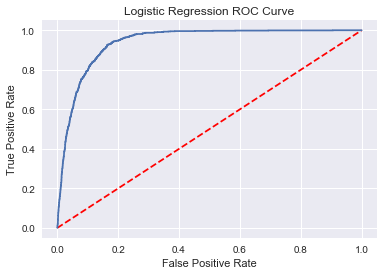

In [32]:
_ = plt.plot([0, 1], [0, 1], 'k--', color='red')
_ = plt.plot(fpr, tpr, label='Logistic Regression')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Logistic Regression ROC Curve')

## 5.5 AUC score

In [33]:
roc_auc_score(y_test, y_pred_prob)

0.9391413464768108

# 7. Conclusion

Reduce the education category doesn't improve our accuracy too much, the accuray is 91%.